In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

sns.set(style="whitegrid")

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

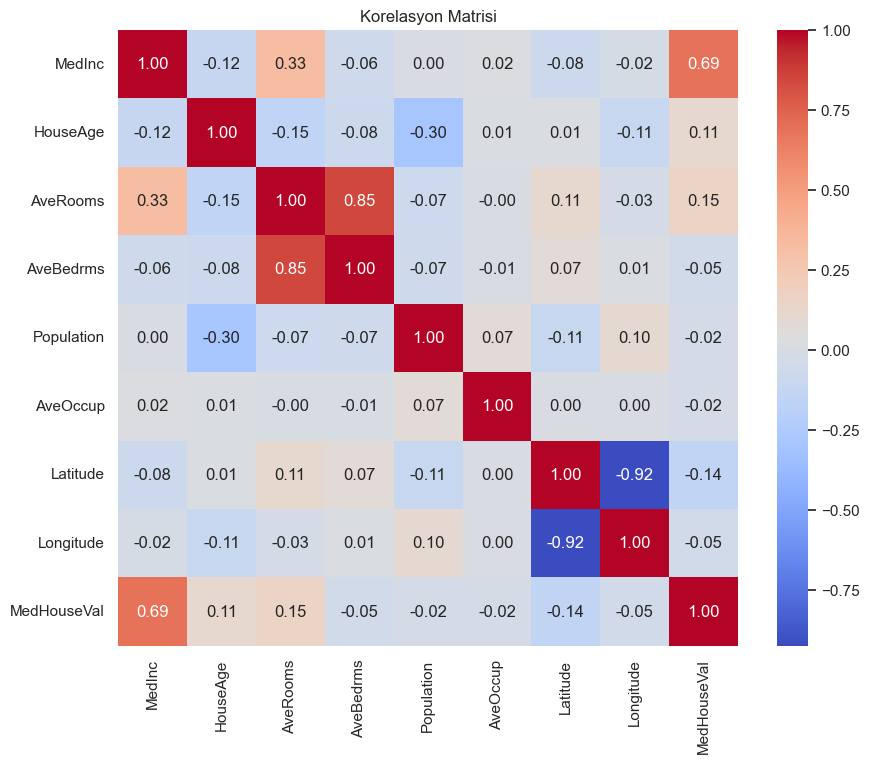

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [7]:
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"R-Kare Skoru: {r2:.2f}")


Ortalama Kare Hata (MSE): 0.56
R-Kare Skoru: 0.58


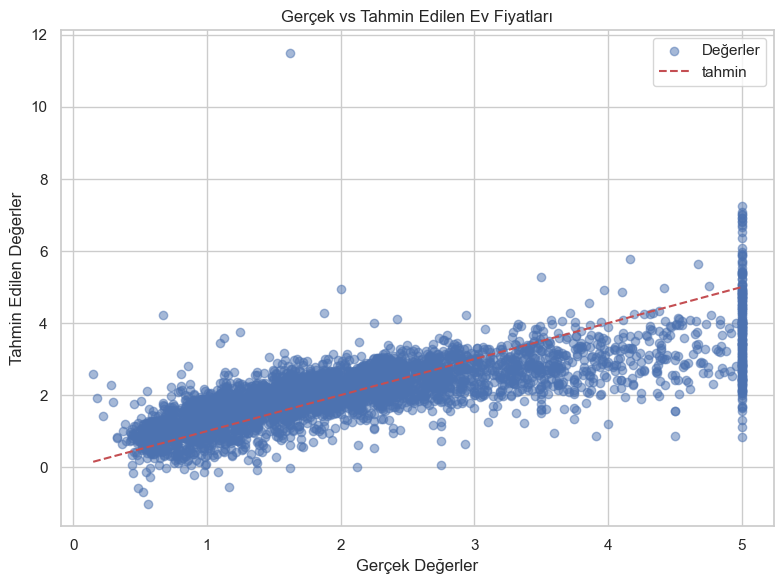

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek vs Tahmin Edilen Ev Fiyatları")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--',label="tahmin")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [15]:
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {mse_ridge:.2f}")
print(f"Ridge R^2: {r2_ridge:.2f}")

Ridge MSE: 0.56
Ridge R^2: 0.58


In [16]:
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso:.2f}")
print(f"Lasso R^2: {r2_lasso:.2f}")

Lasso MSE: 0.61
Lasso R^2: 0.53


In [17]:
print("Model Karşılaştırması:\n")
print(f"Linear Regression R^2: {r2:.2f}")
print(f"Ridge Regression R^2:  {r2_ridge:.2f}")
print(f"Lasso Regression R^2:  {r2_lasso:.2f}")

Model Karşılaştırması:

Linear Regression R^2: 0.58
Ridge Regression R^2:  0.58
Lasso Regression R^2:  0.53


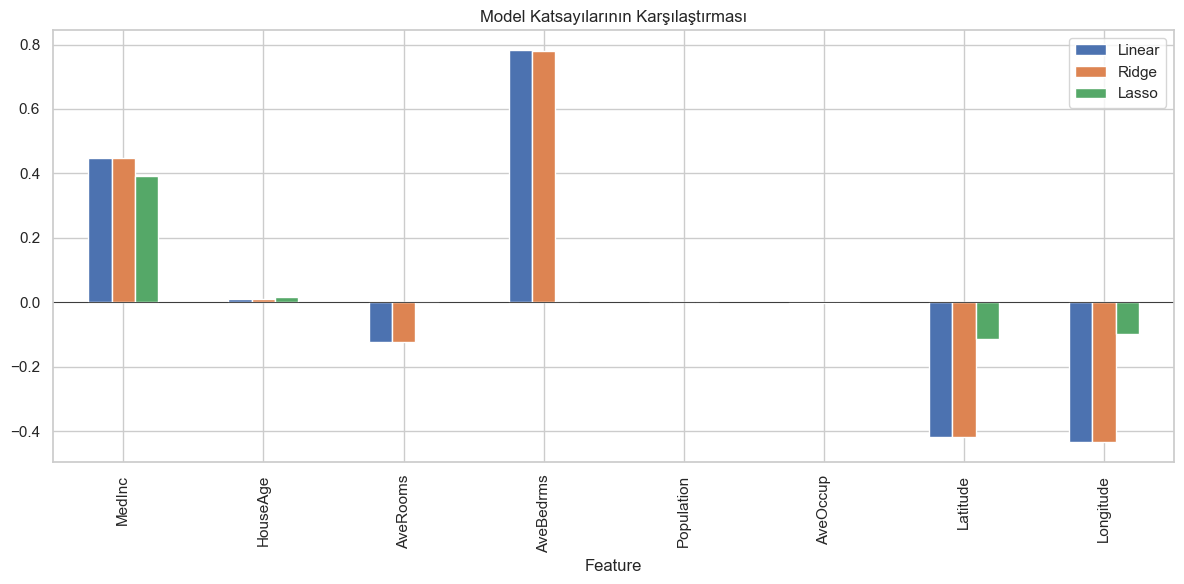

In [18]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Linear": model.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
})

coefficients.set_index("Feature").plot(kind="bar", figsize=(12, 6))
plt.title("Model Katsayılarının Karşılaştırması")
plt.axhline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

grid_ridge = GridSearchCV(estimator=ridge, param_grid=alpha_values, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

print("Ridge en iyi alpha:", grid_ridge.best_params_['alpha'])
print("Ridge en iyi MSE (neg_mean_squared_error):", -grid_ridge.best_score_)

Ridge en iyi alpha: 10
Ridge en iyi MSE (neg_mean_squared_error): 0.5192548258531768


In [21]:
lasso = Lasso(max_iter=10000) 

grid_lasso = GridSearchCV(estimator=lasso, param_grid=alpha_values, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

print("Lasso en iyi alpha:", grid_lasso.best_params_['alpha'])
print("Lasso en iyi MSE (neg_mean_squared_error):", -grid_lasso.best_score_)


Lasso en iyi alpha: 0.001
Lasso en iyi MSE (neg_mean_squared_error): 0.5192748094857909


In [22]:
# En iyi Ridge modeli
best_ridge = Ridge(alpha=grid_ridge.best_params_['alpha'])
best_ridge.fit(X_train, y_train)
y_pred_best_ridge = best_ridge.predict(X_test)

print("En iyi Ridge MSE:", mean_squared_error(y_test, y_pred_best_ridge))
print("En iyi Ridge R^2:", r2_score(y_test, y_pred_best_ridge))


# En iyi Lasso modeli
best_lasso = Lasso(alpha=grid_lasso.best_params_['alpha'], max_iter=10000)
best_lasso.fit(X_train, y_train)
y_pred_best_lasso = best_lasso.predict(X_test)

print("En iyi Lasso MSE:", mean_squared_error(y_test, y_pred_best_lasso))
print("En iyi Lasso R^2:", r2_score(y_test, y_pred_best_lasso))


En iyi Ridge MSE: 0.5550405537343013
En iyi Ridge R^2: 0.5764371559180014
En iyi Lasso MSE: 0.5538940157172418
En iyi Lasso R^2: 0.5773121026225017


In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
ridge_scaled = Ridge(alpha=grid_ridge.best_params_['alpha'])
ridge_scaled.fit(X_train_scaled, y_train)

y_pred_ridge_scaled = ridge_scaled.predict(X_test_scaled)

print("Ölçeklenmiş Ridge MSE:", mean_squared_error(y_test, y_pred_ridge_scaled))
print("Ölçeklenmiş Ridge R^2:", r2_score(y_test, y_pred_ridge_scaled))


Ölçeklenmiş Ridge MSE: 0.5555349089718647
Ölçeklenmiş Ridge R^2: 0.5760599032848371


In [26]:
lasso_scaled = Lasso(alpha=grid_lasso.best_params_['alpha'], max_iter=10000)
lasso_scaled.fit(X_train_scaled, y_train)

y_pred_lasso_scaled = lasso_scaled.predict(X_test_scaled)

print("Ölçeklenmiş Lasso MSE:", mean_squared_error(y_test, y_pred_lasso_scaled))
print("Ölçeklenmiş Lasso R^2:", r2_score(y_test, y_pred_lasso_scaled))

Ölçeklenmiş Lasso MSE: 0.5544913600832686
Ölçeklenmiş Lasso R^2: 0.5768562568705682


In [27]:
# Geliştirilmemiş Ridge
ridge_plain = Ridge(alpha=1.0)
ridge_plain.fit(X_train, y_train)
y_pred_ridge_plain = ridge_plain.predict(X_test)
mse_ridge_plain = mean_squared_error(y_test, y_pred_ridge_plain)
r2_ridge_plain = r2_score(y_test, y_pred_ridge_plain)

# Geliştirilmiş Ridge (ölçeklenmiş + en iyi alpha)
mse_ridge_scaled = mean_squared_error(y_test, y_pred_ridge_scaled)
r2_ridge_scaled = r2_score(y_test, y_pred_ridge_scaled)

# Geliştirilmemiş Lasso
lasso_plain = Lasso(alpha=1.0, max_iter=10000)
lasso_plain.fit(X_train, y_train)
y_pred_lasso_plain = lasso_plain.predict(X_test)
mse_lasso_plain = mean_squared_error(y_test, y_pred_lasso_plain)
r2_lasso_plain = r2_score(y_test, y_pred_lasso_plain)

# Geliştirilmiş Lasso (ölçeklenmiş + en iyi alpha)
mse_lasso_scaled = mean_squared_error(y_test, y_pred_lasso_scaled)
r2_lasso_scaled = r2_score(y_test, y_pred_lasso_scaled)


print("📊 GELİŞTİRİLMİŞ vs. GELİŞTİRİLMEMİŞ KARŞILAŞTIRMA:\n")

print(f"{'Model':<25} | {'MSE':<10} | {'R²':<10}")
print("-" * 50)
print(f"{'Ridge (Normal)':<25} | {mse_ridge_plain:.4f}   | {r2_ridge_plain:.4f}")
print(f"{'Ridge (Geliştirilmiş)':<25} | {mse_ridge_scaled:.4f}   | {r2_ridge_scaled:.4f}")
print()
print(f"{'Lasso (Normal)':<25} | {mse_lasso_plain:.4f}   | {r2_lasso_plain:.4f}")
print(f"{'Lasso (Geliştirilmiş)':<25} | {mse_lasso_scaled:.4f}   | {r2_lasso_scaled:.4f}")


📊 GELİŞTİRİLMİŞ vs. GELİŞTİRİLMEMİŞ KARŞILAŞTIRMA:

Model                     | MSE        | R²        
--------------------------------------------------
Ridge (Normal)            | 0.5558   | 0.5759
Ridge (Geliştirilmiş)     | 0.5555   | 0.5761

Lasso (Normal)            | 0.9380   | 0.2842
Lasso (Geliştirilmiş)     | 0.5545   | 0.5769


In [28]:
model_names = [
    "Ridge\n(Normal)",
    "Ridge\n(Geliştirilmiş)",
    "Lasso\n(Normal)",
    "Lasso\n(Geliştirilmiş)"
]

mse_values = [
    mse_ridge_plain,
    mse_ridge_scaled,
    mse_lasso_plain,
    mse_lasso_scaled
]

r2_values = [
    r2_ridge_plain,
    r2_ridge_scaled,
    r2_lasso_plain,
    r2_lasso_scaled
]


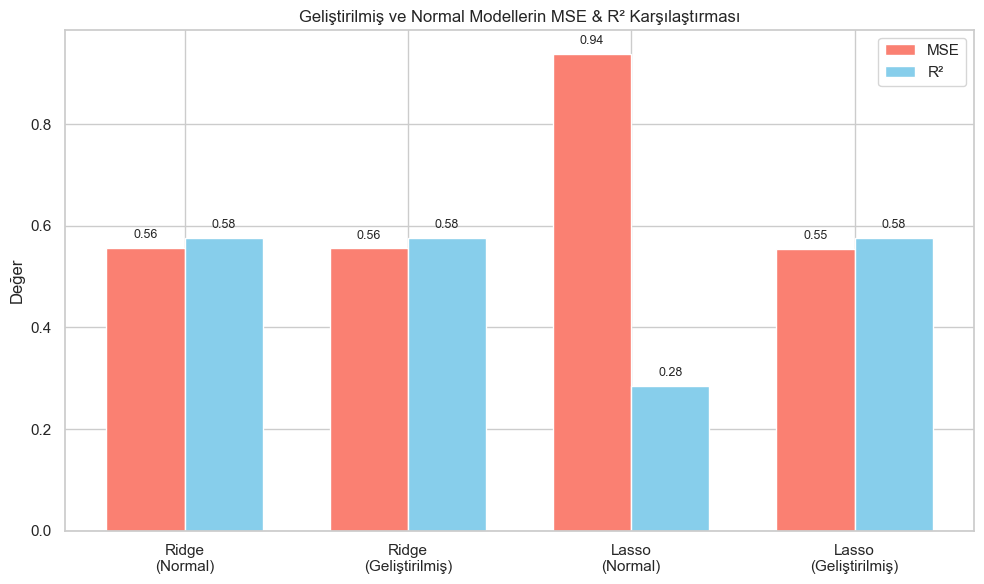

In [29]:
x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))

bars1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='salmon')

bars2 = ax1.bar(x + width/2, r2_values, width, label='R²', color='skyblue')

ax1.set_ylabel("Değer")
ax1.set_title("Geliştirilmiş ve Normal Modellerin MSE & R² Karşılaştırması")
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

In [30]:
import joblib

In [31]:
# Geliştirilmiş (ve ölçeklenmiş) Ridge modelini kaydediyoruz
joblib.dump(ridge_scaled, "ridge_model.joblib")

['ridge_model.joblib']

In [32]:
# Modeli yükle(çağır)
loaded_model = joblib.load("ridge_model.joblib")

y_loaded_pred = loaded_model.predict(X_test_scaled)

print("Yüklenen modelin MSE:", mean_squared_error(y_test, y_loaded_pred))
print("Yüklenen modelin R²:", r2_score(y_test, y_loaded_pred))


Yüklenen modelin MSE: 0.5555349089718647
Yüklenen modelin R²: 0.5760599032848371


In [33]:
joblib.dump(scaler, "scaler.joblib")
#scaleri de yükledik

['scaler.joblib']

In [34]:
loaded_scaler = joblib.load("scaler.joblib")
#bu şekilde çağrılacak